In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#creating a new column Family in the dataset by adding SibSp an Parch
df['Family'] = df['SibSp'] + df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [4]:
#Ticket-->we can skip as it is just a random number

In [5]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [6]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
#Based on the categories, we will analyze which category people are more likely to survive
#Low,Mid,Mid-High,High
df['Fare_Category']=pd.cut(df.Fare,bins = [0, 7.9, 14.45, 31.00, 512],
                           labels = ['Low','Mid','Mid-High','High'])
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [8]:
#Comparing Fare with Fare_Category
df[['Fare','Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
5,8.4583,Mid
6,51.8625,High
7,21.0750,Mid-High
8,11.1333,Mid
9,30.0708,Mid-High


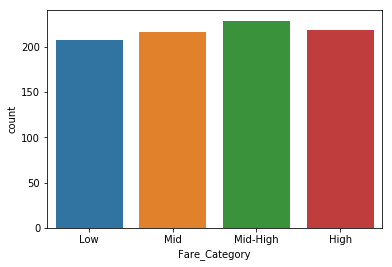

In [9]:
#Visualize the Fare_Category
## Countplot gives you entire count of a category --> categories of Survived and Deceased
sns.countplot(x ='Fare_Category' , data = df)

Text(0.5, 1.0, 'Survival based on Fare_Category')

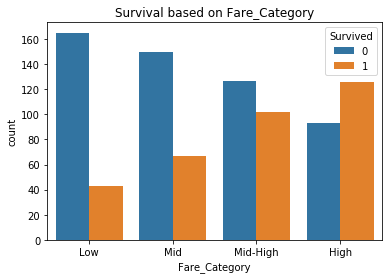

In [10]:
#Visualizing based on Survived
sns.countplot(x ='Fare_Category' ,hue= 'Survived' ,data = df).\
               set_title('Survival based on Fare_Category')

In [11]:
#Embarked : Port--> from where the passenger had boarded the ship
df.Embarked.value_counts(normalize = True) 

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [12]:
#out of 100% passengers, which port has taken more %
df.Embarked.value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

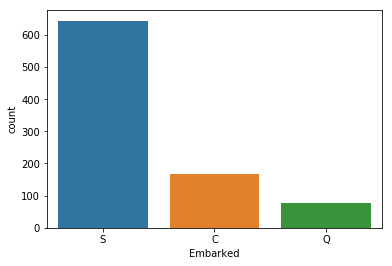

In [13]:
#Visualizing the port column
sns.countplot(x='Embarked',data = df)

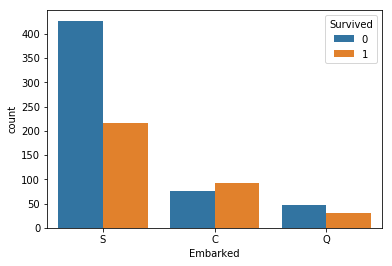

In [14]:
sns.countplot(x='Embarked',hue='Survived',data = df)

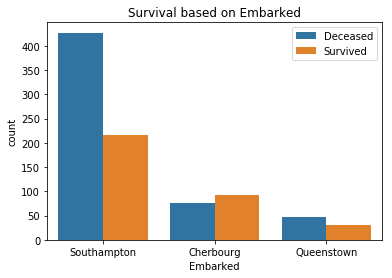

In [15]:
#giving names to ports, setting title,changing labels of 0 and 1
p=sns.countplot(x='Embarked',hue='Survived',data = df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
p.set_title("Survival based on Embarked")
p.legend(labels= ["Deceased","Survived"])

In [16]:
## Imputing the missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [17]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [18]:
## Cabin---> 77% missing values, we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [19]:
df.Cabin.isnull().sum()

0

In [20]:
## Age
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [21]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
# median-->sorting in the order(middle value) Nan in the age column should be substituted with median of age column
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [23]:
#imputing the Embarked column---> with mode i.e mode imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [25]:
df['Age-Range']= pd.cut(df.Age, [0, 10, 20, 30, 40, 60, 80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [27]:
##ENCODING OF CATEGORICAL VARIABLES/COLUMNS:
dummy_set =pd.get_dummies(df.Fare_Category, drop_first = True ) # n columns, we need to include (n-1) dummy columns
dummy_set

,Mid,Mid-High,High
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,1,0,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,1,0


In [28]:
df = pd.concat([df, dummy_set], axis=1)

In [29]:
#encoding:
df = pd. concat([df, pd.get_dummies(df.Cabin,drop_first=True),
                pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
                pd.get_dummies(df.Fare_Category,prefix='Fare',drop_first=True),
                pd.get_dummies(df['Age-Range'],drop_first=True)], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


labelencoder-->0,1,2,3,4...how many  categories are present in the columns,that many numbers we will get 
onehotencoder-->it will create dummy columns for each and every category

In [30]:
#Encoding the Sex column
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [31]:
df.drop(['PassengerId', 'Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_Category','Cabin','Age-Range'],
       axis=1,inplace=True)
df.shape

(891, 164)

In [32]:
df.head()

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,A14,A16,A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [33]:
df.dtypes

Survived         int64
Pclass           int64
Sex              int32
Family           int64
Mid              uint8
Mid-High         uint8
High             uint8
A14              uint8
A16              uint8
A19              uint8
A20              uint8
A23              uint8
A24              uint8
A26              uint8
A31              uint8
A32              uint8
A34              uint8
A36              uint8
A5               uint8
A6               uint8
A7               uint8
B101             uint8
B102             uint8
B18              uint8
B19              uint8
B20              uint8
B22              uint8
B28              uint8
B3               uint8
B30              uint8
                 ...  
E44              uint8
E46              uint8
E49              uint8
E50              uint8
E58              uint8
E63              uint8
E67              uint8
E68              uint8
E77              uint8
E8               uint8
F E69            uint8
F G63            uint8
F G73      

In [34]:
## StandardScalar -->not required for this(Distance Based alogorithm)

In [35]:
## SEPARATING THE INPUT AND OUTPUT DATA  ---> 'X' is input , 'y' is output
X = df.drop("Survived",axis=1)  # so that all other columns can become the input . X contains only input
X.shape

(891, 163)

In [36]:
y = df.iloc[:,0]
y.shape

(891,)

In [37]:
## dividing input and output into training and testing data
#training--> we will be training the model on training data
#testing--> check the performance of the model
## out of 891 rows--> 75% we will be putting in training dataset and 25% in testing data

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=1) 
#random_state to select the constant rows

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 163)
(223, 163)
(668,)
(223,)


In [40]:
X_train

,Pclass,Sex,Family,Mid,Mid-High,High,A14,A16,A19,A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
35,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
46,3,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
453,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
291,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
748,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
41,2,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
224,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
340,2,1,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
125,3,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
803,3,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
y_train

35     0
46     0
453    1
291    1
748    0
41     0
224    1
340    1
125    1
803    1
800    0
108    0
578    0
888    0
593    0
550    1
0      0
684    0
529    0
244    0
74     1
160    0
744    1
66     1
576    1
736    0
412    1
761    0
510    1
741    0
      ..
86     0
478    0
503    0
753    0
215    1
580    1
562    0
398    0
668    0
490    0
252    0
468    0
357    0
254    0
276    0
178    0
281    0
390    1
508    0
749    0
583    0
129    0
144    0
847    0
645    1
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 668, dtype: int64

In [42]:
X_test

,Pclass,Sex,Family,Mid,Mid-High,High,A14,A16,A19,A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
862,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
223,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
84,2,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
680,3,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
535,2,0,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
623,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
148,2,1,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
34,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
241,3,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [43]:
y_test

862    1
223    0
84     1
680    0
535    1
623    0
148    0
3      1
34     0
241    1
794    0
2      1
6      0
17     1
368    1
430    1
819    0
743    0
189    0
437    1
382    0
73     0
710    1
385    0
111    0
821    1
742    1
865    1
619    0
708    1
      ..
875    1
852    0
61     1
277    0
427    1
676    0
493    0
433    0
571    1
773    0
135    0
248    1
345    1
765    1
134    0
507    1
104    0
218    1
850    0
57     0
731    0
543    1
614    0
411    0
307    1
506    1
467    0
740    1
354    0
449    1
Name: Survived, Length: 223, dtype: int64

In [44]:
pd.set_option('display.max_columns',None)   #to display all the columns in the dataset --> none means unlimited

In [45]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,A14,A16,A19,A20,A23,A24,A26,A31,A32,A34,A36,A5,A6,A7,B101,B102,B18,B19,B20,B22,B28,B3,B30,B35,B37,B38,B39,B4,B41,B42,B49,B5,B50,B51 B53 B55,B57 B59 B63 B66,B58 B60,B69,B71,B73,B77,B78,B79,B80,B82 B84,B86,B94,B96 B98,C101,C103,C104,C106,C110,C111,C118,C123,C124,C125,C126,C128,C148,C2,C22 C26,C23 C25 C27,C30,C32,C45,C46,C47,C49,C50,C52,C54,C62 C64,C65,C68,C7,C70,C78,C82,C83,C85,C86,C87,C90,C91,C92,C93,C95,C99,D,D10 D12,D11,D15,D17,D19,D20,D21,D26,D28,D30,D33,D35,D36,D37,D45,D46,D47,D48,D49,D50,D56,D6,D7,D9,E10,E101,E12,E121,E17,E24,E25,E31,E33,E34,E36,E38,E40,E44,E46,E49,E50,E58,E63,E67,E68,E77,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,NA,T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
5,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
6,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
7,0,3,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
8,1,3,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
9,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [46]:
pd.get_option('display.max_rows') # to see by default how many rows will be displayed

60

In [47]:
#reset to prewvious mode
pd.reset_option('display.max_columns')  #we can set and reset according to our requirements

In [48]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,A14,A16,A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5,0,3,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
6,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
7,0,3,1,4,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
8,1,3,0,2,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
9,1,2,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


For classification : we are classifying based on survived or not
    Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()   #creating an object for logistic regression

In [50]:
# we have to apply this object (log_reg) to the training data
log_reg.fit(X_train,y_train)  # with help of fit method, we are fitting the logistic regression on training data
## SYNTAX :  objectname.fit(inputdata,outputdata)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Instead of directly predicting on test data, let us see how well the model predicts the training data

In [54]:
#predicting on the training data
## SYNTAX : objectname.predict(Input)
y_train_pred=log_reg.predict(X_train)
y_train_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

y_train_pred --> model predicted output
y_train -->original output

In [55]:
y_train == y_train_pred  #comparing original data output and model predicted output

35      True
46      True
453     True
291     True
748     True
41     False
224     True
340     True
125    False
803    False
800     True
108     True
578    False
888     True
593     True
550     True
0       True
684     True
529     True
244     True
74     False
160     True
744    False
66      True
576     True
736     True
412     True
761     True
510    False
741     True
       ...  
86      True
478     True
503    False
753     True
215     True
580     True
562     True
398     True
668     True
490     True
252     True
468     True
357    False
254     True
276     True
178     True
281     True
390     True
508     True
749     True
583    False
129     True
144     True
847     True
645     True
715     True
767    False
72      True
235     True
37      True
Name: Survived, Length: 668, dtype: bool

In [57]:
# accuracy_score --> with the help of this metric , we can evaluate the overall performance of model
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.844311377245509

In [ ]:
##Performance Metrics --> to evaluate the model is predicting

In [58]:
# PREDICTING THE MODEL ON TEST :
y_test_pred = log_reg.predict(X_test)
y_test_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [59]:
y_test == y_test_pred

862     True
223     True
84      True
680    False
535     True
623     True
148     True
3       True
34      True
241     True
794     True
2       True
6       True
17     False
368     True
430    False
819     True
743     True
189     True
437    False
382     True
73      True
710     True
385     True
111    False
821    False
742     True
865     True
619     True
708     True
       ...  
875     True
852    False
61      True
277     True
427     True
676     True
493     True
433     True
571     True
773     True
135     True
248    False
345     True
765     True
134     True
507    False
104     True
218     True
850     True
57      True
731     True
543    False
614     True
411     True
307     True
506     True
467     True
740    False
354     True
449    False
Name: Survived, Length: 223, dtype: bool

In [60]:
# accuracy of test data (original test data o/p and model predicted o/p
accuracy_score(y_test , y_test_pred)

0.7668161434977578